前提：未来状态仅由当前状态决定，与过去无关。
PTX=X: 马尔可夫平稳分布，X表示每个网页的重要性，PT为归一化后的转移矩阵，平稳分布即X在转移后始终不变

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[0.2727 0.2727 0.1364 0.1818 0.0455 0.0909]


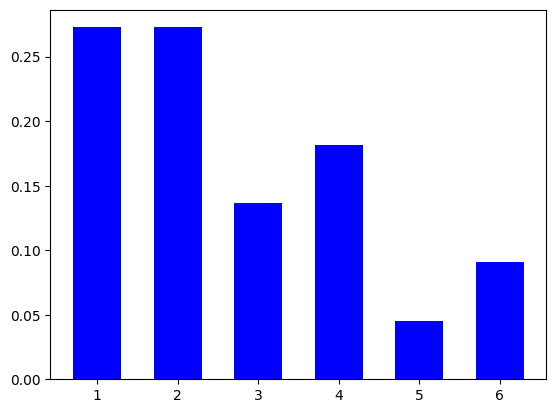

In [ ]:
import numpy as np
from scipy.sparse.linalg import eigs
import pylab as plt

L = [(1,2),(2,3),(2,4),(3,4),(3,5),(3,6),(4,1),(5,6),(6,1)]
w = np.zeros((6,6))
print(w)
for i in range(len(L)):
    w[L[i][0]-1, L[i][1]-1] = 1
r = np.sum(w, axis=1,keepdims=True)
P = w/r
val, vec = eigs(P.T,1) # 求转移矩阵转置的最大特征值及对应特征向量
V = vec.real # 求转移矩阵转置的最大特征值及对应特征向量
V = V.flatten() # 转换为一维数组
V = V/V.sum() # 归一化
print(np.round(V,4))
plt.bar(range(1,len(w)+1),V,width=0.6,color='b')
plt.show()

引入用户行为解释度

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[0.2675 0.2524 0.1323 0.1697 0.0625 0.1156]


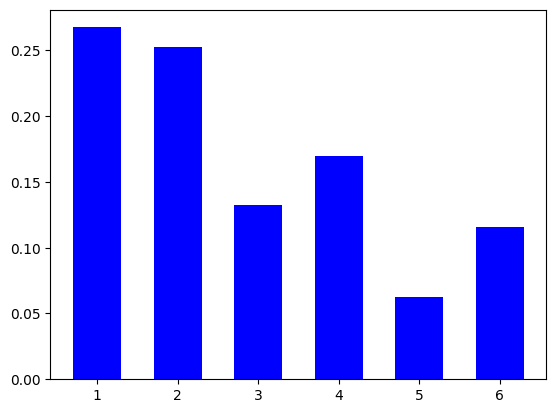

In [ ]:
import numpy as np
from scipy.sparse.linalg import eigs
import pylab as plt

L = [(1,2),(2,3),(2,4),(3,4),(3,5),(3,6),(4,1),(5,6),(6,1)]
w = np.zeros((6,6))
print(w)
for i in range(len(L)):
    w[L[i][0]-1, L[i][1]-1] = 1
r = np.sum(w, axis=1,keepdims=True)
P = (1-0.85)/w.shape[0] + 0.85* w/r # 引入阻尼因子
val, vec = eigs(P.T,1) 
V = vec.real 
V = V.flatten() 
V = V/V.sum() 
print(np.round(V,4))
plt.bar(range(1,len(w)+1),V,width=0.6,color='b')
plt.show()